In [1]:
from structure_growth import *

%matplotlib inline

+ From the FLRW metric, as the universe evolves, the scale factor, $a$ changes, but the metric remains FLRW

+ That means, that a isotropic and homogeneous universe will remain isotropic and homogeneous

+ Such a universe will not form clumps, or galaxies, or stars, or planets, or you

+ It is time we relax that condition

+ For structures to grow, first, it is necessary to have inhomogeneities in the early universe (as initial conditions) or seeds

+ Then, we need to look at how these seeds can (and do) grow

+ Since the oldest picture of the universe we can get (with photons) is the CMB, it makes sense to start looking for those inhomogeneities there...

# Seed imprints in the CMB

+ As we saw in the previous lecture, the CMB is remarkably homogeneous

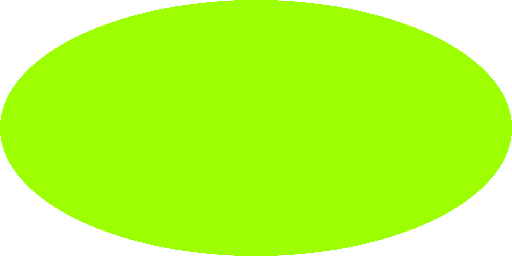

In [2]:
Image(filename="./cmb.png", width=750)

+ If we subtract the mean, and increase the contrast by a factor of 1,000, we observe some structures that seem to be associated with our own galaxy and a dipole, which can be explained if we are moving relative to the CMB frame of reference, but still no sign of anisotropies in the early universe that could give origin to the rich structures we observe today. 

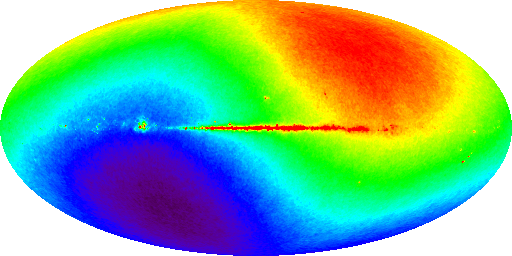

In [3]:
Image(filename="./cmb_delta3.png", width=750)

+ If we re-do the exercise again, subtract the dipole, and increase the contrast by another factor of 100, this is what we see:

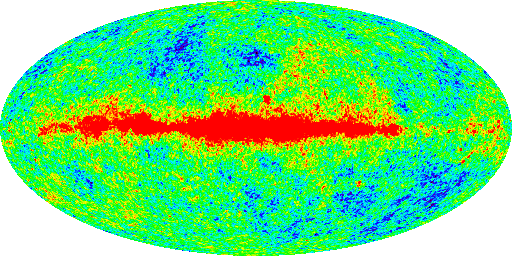

In [4]:
Image(filename="./cmb_delta5.png", width=750)

+ Now the strudtures linked to our own galaxy dominate the galactic plane, but out of it we see it: anisotropies!

+ These were initially discovered by a second instrument on COBE, and were one of the main reasons COBE scientists won the Nobel prize. For the first time, we were capable of observing the seeds of the cosmic structures we observe today.

+ The most acccurate view of them we have over the whole sky is that from the Planck mission:

<center><img src=https://www.researchgate.net/profile/Tien_Bui7/publication/309905733/figure/fig1/AS:427296499736581@1478886832635/All-sky-map-of-the-CMB-temperature-as-obtained-by-Planck.png width=1000 class='center'>

+ We see a complex field, and the first thing we would like to do is to characterize it. To do so, we need a mathematical description of it.

+ We are going to use this as an opportunity to introduce Fourier (or spectral) analysis, an extremely useful technique to add to your mathematical toolkit (even if you don't go into physics)!

# A quick and non-rigorous introduction to Fourier analysis

+ In math, we can use trigonometric functions to describe waves. In particular, we can use the sine function:

$$f(x)=Asin(nx+\phi)$$

+ $A$ is the amplitude of the wave (how large the perturbance can get), $n$ determines the frequency (how many oscillations of the perturbance we observe in a given interval) and $\phi$ gives the initial phase (how do we precisely locate the perturbance along our coordinate axes)

In [65]:
# We can make a quick interactive plot to see how these factors affect the wave:
A_range   = (0.5, 3.0, 0.1)
n_range   = (1, 2, 0.1)
phi_range = (0, 3, 0.1)

def plotting(A, n, phi):
    # Take an interval for the x axis to plot
    x = np.linspace(0, 10, 100)
    # Compute the wave function
    y = A * np.sin(n * x + phi)
    # Plot
    matplotlib.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot(1,1,1)
    ax.plot(x,y,'k-', linewidth=4)
    ax.set_ylim((-A_range[1], A_range[1]))
    ax.set_xlabel(r"X"), ax.set_ylabel(r"f(X)")
    ax.grid()

In [6]:
# Now we can call the interactive plot
interactive_plot = interactive(plotting, A=A_range, n=n_range, phi=phi_range)
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=1.7000000000000002, description='A', max=3.0, min=0.5), FloatSlider(va…

+ When x has units, the frequency determines the inverse of the scale on which the wave changes, the higher n, the smaller the scales in which the wave changes significantly

+ The intuition behind Fourier analysis is that when we add waves with different amplitudes, frequencies and phases, we can generate complex functions:

In [7]:
# Let's look at this with another interactive visualization
def combine_waves(n_waves):
    # Fix random seed for reproducibility
    np.random.seed(seed=1)
    # Sample randomly their amplitudes, frequencies, and phases
    As = np.random.uniform(low=0.1, high=1.0, size=n_waves)
    ns = np.random.uniform(low=0.1, high=20,  size=n_waves)
    phis = np.random.uniform(low=0, high=2*np.pi, size=n_waves)

    # Define the interval we want to evaluate the waves in
    xs = np.linspace(0, 10, 1000)

    # Compute the inividual waves
    ys = [A * np.sin(n * xs + phi) for A,n,phi in zip(As, ns, phis)]

    # Combine the waves
    y  = np.sum(np.array(ys), axis=0)

    # Plot results
    matplotlib.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot(1,1,1)
    for i in range(n_waves):
        ax.plot(xs, ys[i])
    ax.plot(xs, y, 'k-', linewidth=4)
    ax.grid(), ax.set_xlabel(r"X"), ax.set_ylabel(r"f(X)")

In [8]:
# Now we can call the interactive plot
interactive_plot = interactive(combine_waves, n_waves=(1, 10, 1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=5, description='n_waves', max=10, min=1), Output()), _dom_classes=('widg…

+ Once we realize this intuition, the key idea is to "flip" it: if the result of combining waves can be an (arbitrarily) complex function, maybe we can decompose any function in a sum of waves. We can.

+ That is, we should be able to write any function as:

$$f(x) = \frac{A_0}{2}+\sum_{n}A_n sin(k_n x + \phi_n)$$

+ And, if we agree on a series of frequencies (and phases), the function will be fully determined by a list of numbers, the amplitudes corresponding to these frequencies (or modes)

+ This is analogous to what we do with vectors. A vector can be expressed as the sum of other vectors. Once we agree on a set of vectors to act as a basis, we can express any other vector just by their coordinates (the numbers we need to multiply the basis vectors by to form them):

$$\bar{a} = \sum_{i}a_i \bar{a}^i$$

<center><img src=https://upload.wikimedia.org/wikipedia/commons/3/3e/Vector_in_2D_space_and_its_decomposition.png width=300 class='center'>

+ Functions ARE vectors (they satisfy all the conditions that define vectors), and pure sine waves can be used as a "basis" on which we can project any function. The coordinates of a function on that basis are the Fourier coefficients.



+ If you think a little bit about it, you will realize we have already encountered another basis to decompose functions: polynomials. We did that when we discussed the Taylor decomposition of a function.


+ As with vectors by looking at the Fourier coefficients (coordinates) of a function, we can figure out which components are more important, and as a result in which scales the function experiences larger changes.

+ For a "usual" vector space, the number of vectors in the basis defines the dimensionality of the space. For example, in 2D space, we only need two coordinates (we are projecting on two basis vectors), while in 3D space we need three coordinates (and three basis vectors).


+ In Fourier space, we can use an infinite number of sine waves, it is a space with infinite dimensions (I know, it sounds crazy).

+ Furthermore, there is no reason why we should restrict ourselves to frequencies represented by integer numbers, any real number would do.

+ If we move from **discrete** frequencies to **continuous** frequencies, the **discrete** sums will become **continuous sums** aka **integrals**.

+ This is how we move from "Fourier series" to "Fourier transforms":

$$\hat{f}(k) = \int_{0}^{L}dxf(x)sin(kx)$$

+ If we have a function of a variable x, its Fourier transform is not a function of x anymore, but of the wavenumber k. It can be thought as the continuous limit of the series coefficients, and tells us which scales are relevant to describe changes in the function

+ For example, a pure sine wave has a single frequency (a single relevant scale), as a result, its Fourier transform should be zero for all k's except the one corresponding to the sine function, that is, a Dirac delta.


+ We can find an approximate solution using the FFT, which is a numerical algorithm to estimate it:

In [9]:
# The domain in real space is defined by the range, and how
# many points we use to sample it
Period  = 1.0
Npoints = 1000
N       = Npoints
Spacing = Period/Npoints

x   = np.linspace(0,Period,Npoints)   # independent variable

# Let's build a simple sine wave
a   = 1.5                             # amplitude
n   = 70.0                            # frequency
phi = 78.5                            # phase
y   = a * np.sin(n*2.0*np.pi*x + phi) # wave
# And compute its Fourier transform
Fy = np.fft.fft(y)                                    # fourier transform
k  = np.linspace(0,1.0/(2.0*Spacing),int(Npoints/2))  # frequencies

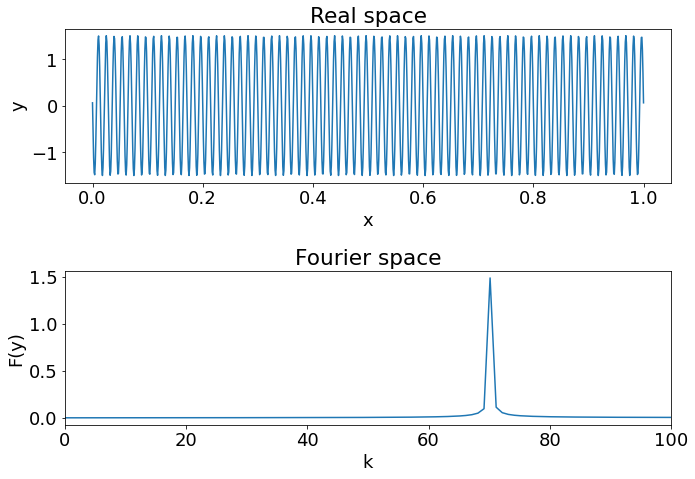

In [10]:
# Let's plot both functions
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(211)
ax.plot(x,y)
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_title(r"Real space")

ax = fig.add_subplot(212)
ax.plot(k,2.0/N*np.abs(Fy[0:int(Npoints/2)]))
ax.set_xlim([0,100])
ax.set_xlabel('k'), ax.set_ylabel('F(y)'), ax.set_title(r"Fourier space")

plt.tight_layout()

In [11]:
# We can re-do the combination of waves analysis
# computing as well the Fourier transform

def combine_waves(n_waves):
    # Fix random seed for reproducibility
    np.random.seed(seed=1)
    # Sample randomly their amplitudes, frequencies, and phases
    As = np.random.uniform(low=0.1, high=1.0,  size=n_waves)
    ns = np.random.uniform(low=1.0, high=100,  size=n_waves)
    phis = np.random.uniform(low=0, high=2*np.pi, size=n_waves)
    # Define the interval we want to evaluate the waves in
    Period  = 1.0
    Npoints = 10000
    N       = Npoints
    Spacing = Period/Npoints
    xs = np.linspace(0, Period, Npoints)
    # Compute the inividual waves
    ys = [A * np.sin(2 * np.pi * n * xs + phi) for A,n,phi in zip(As, ns, phis)]
    # Combine the waves
    y  = np.sum(np.array(ys), axis=0)
    # Compute the fourier transform
    Fy = np.fft.fft(y)                                    # fourier transform
    k  = np.linspace(0,1.0/(2.0*Spacing),int(Npoints/2))  # frequencies
    # Plot results
    matplotlib.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(10,10))
    ax  = fig.add_subplot(2,1,1)
    for i in range(len(As)):
        ax.plot(xs, ys[i])
    ax.plot(xs, y, 'k-', linewidth=4)
    ax.grid(), ax.set_xlabel(r"X"), ax.set_ylabel(r"f(X)")  
    ax  = fig.add_subplot(2,1,2)
    ax.plot(k, 2.0/N*np.abs(Fy[0:int(Npoints/2)]))
    ax.set_xlim((0,100))

In [12]:
# Now we can call the interactive plot
interactive_plot = interactive(combine_waves, n_waves=(1, 10, 1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=5, description='n_waves', max=10, min=1), Output()), _dom_classes=('widg…

+ Of course, the Fourier transform can be computed for any function, not just combinations of sine waves.

In [70]:
# The domain in real space is defined by the range, and how
# many points we use to sample it
Period  = 1.0
Npoints = 1000
N       = Npoints
Spacing = Period/Npoints

x   = np.linspace(0,Period,Npoints)   # independent variable

# Let's pick different functions
#y   = np.sin(20 * np.pi * x) # sine wave

#y   = x                      # linear function

y   = x - x**2 + x**3 - x**4 # polynomial


# And compute its Fourier transform
Fy = np.fft.fft(y)                                    # fourier transform
k  = np.linspace(0,1.0/(2.0*Spacing),int(Npoints/2))  # frequencies

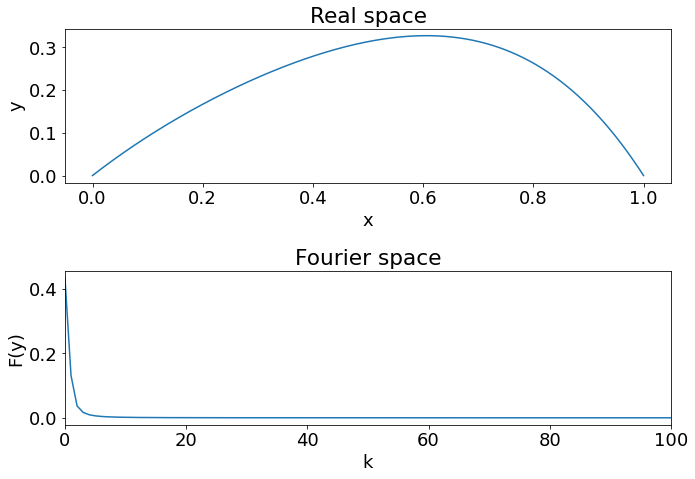

In [71]:
# Let's plot both functions
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(211)
ax.plot(x,y)
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_title(r"Real space")

ax = fig.add_subplot(212)
ax.plot(k,2.0/N*np.abs(Fy[0:int(Npoints/2)]))
ax.set_xlim([0,100])
ax.set_xlabel('k'), ax.set_ylabel('F(y)'), ax.set_title(r"Fourier space")

plt.tight_layout()

+ The concept of Fourier transform can be generalized to more dimensions. For the CMB, which is a 2D field, it makes sense to have a quick look at 2D waves

+ In two dimensions, we can combine waves in 1 dimension along two orthogonal directions. These can be defined by a wave vector, that defines the wave's frequencies along those directions:

$$f(x) = A \sin\left(k_x x + k_y y\right)$$

+ Let's see how one of these 2D waves would look like:

In [72]:
def wave_2d(kx, ky):
    # Define the space where we want to compute the values of the wave:
    Period  = 1.0
    Npoints = 1000
    Spacing = Period/Npoints

    x,y = np.meshgrid(np.linspace(0.0,Period,Npoints),np.linspace(0.0,Period,Npoints))

    # Compute the wave
    A  = 1
    
    z = A * np.sin(kx * x  + ky * y)

    # Plot the wave

    fig = plt.figure(figsize=(20,7))
    ax  = fig.add_subplot(121, projection='3d')
    ax.plot_surface(x,y,z, cmap='bwr')
    ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")

    # Sometimes it is easier to have a cenital view
    ax  = fig.add_subplot(122)
    ax.pcolormesh(x,y,z, cmap='bwr')
    ax.set_aspect('equal')
    ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")
    
    plt.tight_layout()

In [16]:
# Now we can call the interactive plot
interactive_plot = interactive(wave_2d, kx=(0, 20, 1), ky=(0, 20,1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=10, description='kx', max=20), IntSlider(value=10, description='ky', max…

+ As for the 1d case, linear combinations (sums) or 2d waves can result in complicated 2d functions:

In [73]:
# Let's look at this with another interactive visualization
def combine_waves_2d(n_waves):
    # Fix random seed for reproducibility
    np.random.seed(seed=5)
    # Define the domain we want to evaluate the waves in
    Period  = 1.0
    Npoints = 200
    Spacing = Period/Npoints

    x,y = np.meshgrid(np.linspace(0.0,Period,Npoints),np.linspace(0.0,Period,Npoints))
    
    # Sample randomly their amplitudes, frequencies, and phases
    As  = np.random.uniform(low=0.1, high=1.0, size=n_waves)
    kxs = np.random.uniform(low=0,   high=50,  size=n_waves)
    kys = np.random.uniform(low=0,   high=50,  size=n_waves)
    # Compute the inividual waves
    zs = [A * np.sin(kx * x  + ky * y) for A,kx,ky in zip(As, kxs, kys)]

    # Combine the waves
    z  = np.sum(np.array(zs), axis=0)

    # Plot results
    fig = plt.figure(figsize=(20,7))
    ax  = fig.add_subplot(121, projection='3d')
    ax.plot_surface(x,y,z, cmap='RdYlBu_r')
    ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")

    # Sometimes it is easier to have a cenital view
    ax  = fig.add_subplot(122)
    ax.pcolormesh(x,y,z, cmap='RdYlBu_r')
    ax.set_aspect('equal')
    ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")
    
    plt.tight_layout()

In [18]:
# Now we can call the interactive plot
interactive_plot = interactive(combine_waves_2d, n_waves=(1,20,1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=10, description='n_waves', max=20, min=1), Output()), _dom_classes=('wid…

+ As before, we can extend these ideas can be extended to continuous frequencies into a 2D Fourier transform:

$$\hat{f}(k_x,k_y) \propto \int_{0}^{L_x}dx \int_{0}^{L_y}dy f(x,y) sin(k_x x + k_y y)$$

+ And the interpretation is also analogous

In [19]:
# Let's look at this with another interactive visualization
def combine_waves_2d_ft(n_waves):
    # Fix random seed for reproducibility
    np.random.seed(seed=5)
    # Define the domain we want to evaluate the waves in
    Period  = 1.0
    Npoints = 200
    Spacing = Period/Npoints

    x,y = np.meshgrid(np.linspace(0.0,Period,Npoints),np.linspace(0.0,Period,Npoints))
    
    # Sample randomly their amplitudes, frequencies, and phases
    As  = np.random.uniform(low=0.1, high=1.0, size=n_waves)
    kxs = np.random.uniform(low=0,   high=50,  size=n_waves)
    kys = np.random.uniform(low=0,   high=50,  size=n_waves)
    # Compute the inividual waves
    zs = [A * np.sin(kx * x  + ky * y) for A,kx,ky in zip(As, kxs, kys)]

    # Combine the waves
    z  = np.sum(np.array(zs), axis=0)
    
    # Compute the Fourier transform
    F_z = np.fft.fftshift(np.fft.fft2(z))

    # Plot results
    fig = plt.figure(figsize=(20,7))
    ax  = fig.add_subplot(121)
    ax.pcolormesh(x,y,z, cmap='RdYlBu_r')
    ax.set_aspect('equal'), ax.set_title(r"Real space")
    ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")
    
    ax  = fig.add_subplot(122)
    ax.pcolormesh(np.real(F_z)**2, cmap='RdYlBu_r')
    ax.set_aspect('equal'), ax.set_title(r"Fourier space")
    ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")
    
    plt.tight_layout()

In [20]:
# Now we can call the interactive plot
interactive_plot = interactive(combine_waves_2d_ft, n_waves=(1,20,1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=10, description='n_waves', max=20, min=1), Output()), _dom_classes=('wid…

+ And it can be applied to different functions as well

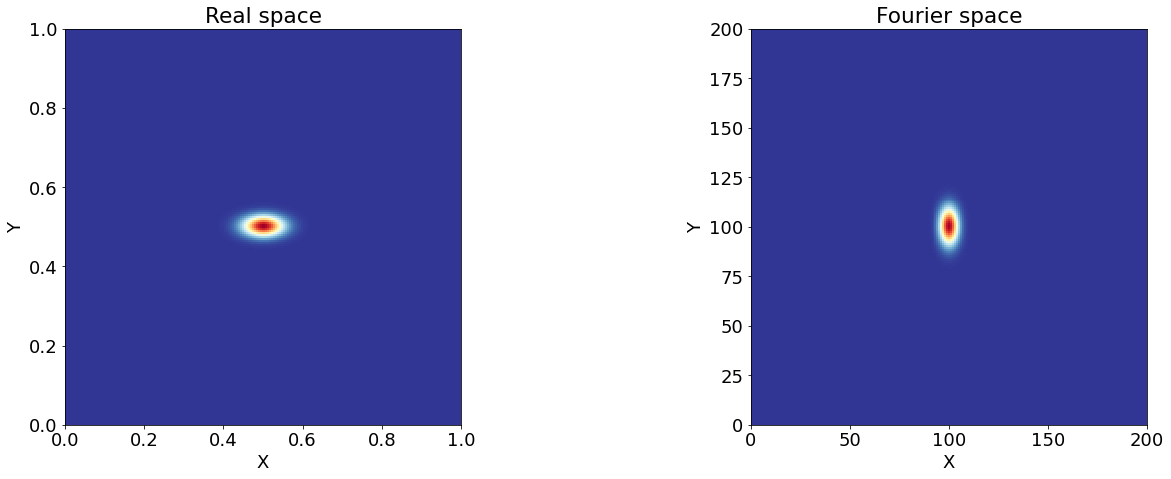

In [21]:
# Define the domain we want to evaluate the waves in
Period  = 1.0
Npoints = 200
Spacing = Period/Npoints

x,y = np.meshgrid(np.linspace(0.0,Period,Npoints),np.linspace(0.0,Period,Npoints))
    
# Define a new function
z   = np.exp(-((2*(x-0.5))**2+(4*(y-0.5))**2)/0.01)
    
# Compute the Fourier transform
F_z = np.fft.fftshift(np.fft.fft2(z))

# Plot results
fig = plt.figure(figsize=(20,7))
ax  = fig.add_subplot(121)
ax.pcolormesh(x,y,z, cmap='RdYlBu_r')
ax.set_aspect('equal'), ax.set_title(r"Real space")
ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")
    
ax  = fig.add_subplot(122)
ax.pcolormesh(np.real(F_z)**2, cmap='RdYlBu_r')
ax.set_aspect('equal'), ax.set_title(r"Fourier space")
ax.set_xlabel(r"X"), ax.set_ylabel(r"Y")
    
plt.tight_layout()

# Spherical harmonics

+ The sky is not flat, so strictly speaking, we cannot use a Fourier transform to analyze the CMB (a Fourier decomposition assumes plane waves).


+ Instead, there is a more useful basis of functions defined on the sphere. They are called spherical harmonics, and as with the sine functions from Fourier transforms, we can also decompose, or project, any function on this basis of functions:

$$f(\hat{n})=\sum_{l=0}^{\infty} \sum_{m=-l}^{l} a_{lm} Y_{lm}(\hat{n})$$

+ Each spherical harmonic is defined by two indexes (remember, positions in the sphere are defined by two angles):

$$Y_{lm}(\theta,\phi) = \sqrt{\frac{(2l+1)(l-m)!}{4\pi(l+m)!}}P_l^m(\theta)e^{im\phi}$$

+ where $P_l^m$ are the associated Legendre polynomials

$$P_0^0(x)=1, P_1^0(x)=x, ...$$


+ Let's have a look at how these functions look like:

In [22]:
def visualize_harmonic(m, l):
    from scipy.special import sph_harm
    # Define coordinate grid in which we want to visualize the harmonic
    N_points = 100
    
    phi = np.linspace(0, np.pi, N_points)
    theta = np.linspace(0, 2*np.pi, N_points)
    phi, theta = np.meshgrid(phi, theta)
    
    # The Cartesian coordinates of the unit sphere are then
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    
    # We will color the sphere according to the value of the harmonic
    fcolors = sph_harm(m, l, theta, phi).real
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)
    
    # Display it
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.RdYlBu_r(fcolors))
    plt.show()

In [23]:
# Now we can call the interactive plot
interactive_plot = interactive(visualize_harmonic, m=(-5,5,1), l=(0,5,1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=0, description='m', max=5, min=-5), IntSlider(value=2, description='l', …

+ Now, let's look at how these harmonics look from inside the sphere 

In [24]:
def visualize_harmonic_inside(m, l):
    from scipy.special import sph_harm
    # Define the grid of angles
    x = np.linspace(-np.pi, np.pi, 100)
    y = np.linspace(-np.pi/2, np.pi/2, 50)
    X, Y = np.meshgrid(x, y)

    # Spherical coordinate arrays derived from x, y
    # Necessary conversions to get Mollweide right
    phi = x.copy()    # physical copy
    phi[x < 0] = 2 * np.pi + x[x<0]
    theta = np.pi/2 - y
    PHI, THETA = np.meshgrid(phi, theta)
    
    # We will just plot the real part of the the harmonic
    SH_SP = sph_harm(m, l, PHI, THETA).real    
    
    # Display
    xlabels = ['$210^\circ$', '$240^\circ$','$270^\circ$','$300^\circ$','$330^\circ$',
               '$0^\circ$', '$30^\circ$', '$60^\circ$', '$90^\circ$','$120^\circ$', '$150^\circ$']

    ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
               '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
               '$45^\circ$','$30^\circ$','$15^\circ$']

    fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
    im = ax.pcolormesh(X, Y , SH_SP, cmap='RdYlBu_r')
    ax.set_xticklabels(xlabels, fontsize=14)
    ax.set_yticklabels(ylabels, fontsize=14)
    ax.set_title('real$(Y^2_ 4)$', fontsize=20)
    fig.colorbar(im, orientation='horizontal');
    ax.grid()

In [25]:
# Now we can call the interactive plot
interactive_plot = interactive(visualize_harmonic_inside, m=(-5,5,1), l=(0,5,1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=0, description='m', max=5, min=-5), IntSlider(value=2, description='l', …

+ And, combininig different spherical harmonics, we can get complex functions on the sphere

In [26]:
def combine_harmonics(n):
    from scipy.special import sph_harm
    # Fix random seed for reproducibility
    np.random.seed(seed=1)
    # Sample random harmonics
    As = np.random.uniform(low=0.1, high=1.0, size=n)
    ls = np.random.randint(low=1,   high=20,  size=n)
    ms = np.array([np.random.randint(low=-l, high=l, size=1)[0] for l in ls])
    
    # Define the grid of angles
    x = np.linspace(-np.pi, np.pi, 100)
    y = np.linspace(-np.pi/2, np.pi/2, 50)
    X, Y = np.meshgrid(x, y)

    # Spherical coordinate arrays derived from x, y
    # Necessary conversions to get Mollweide right
    phi = x.copy()    # physical copy
    phi[x < 0] = 2 * np.pi + x[x<0]
    theta = np.pi/2 - y
    PHI, THETA = np.meshgrid(phi, theta)
    
    # Generate the different spherical harmonics
    harms = []
    for i in range(n):
        harms.append(sph_harm(ms[i], ls[i], PHI, THETA).real)
    harms = np.array(harms)
    
    # combine them
    signal = np.sum(harms, axis=0)
    
    # Display
    xlabels = ['$210^\circ$', '$240^\circ$','$270^\circ$','$300^\circ$','$330^\circ$',
               '$0^\circ$', '$30^\circ$', '$60^\circ$', '$90^\circ$','$120^\circ$', '$150^\circ$']

    ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
               '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
               '$45^\circ$','$30^\circ$','$15^\circ$']

    fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
    im = ax.pcolormesh(X, Y , signal, cmap='RdYlBu_r')
    ax.set_xticklabels(xlabels, fontsize=14)
    ax.set_yticklabels(ylabels, fontsize=14)
    ax.set_title('Components={}'.format(n), fontsize=20)
    fig.colorbar(im, orientation='horizontal');
    ax.grid()

In [27]:
# Now we can call the interactive plot
interactive_plot = interactive(combine_harmonics, n=(1,20,1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

+ See how we start to get something that can remind us of the CMB maps we saw:

<center><img src=https://www.researchgate.net/profile/Tien_Bui7/publication/309905733/figure/fig1/AS:427296499736581@1478886832635/All-sky-map-of-the-CMB-temperature-as-obtained-by-Planck.png width=1000 class='center'>

+ Therefore, we can "project" the CMB temperature map onto a speric harmonic base:

$$\delta T(\hat{n}) = \sum_{l=0}^{\infty}\sum_{m=-l}^{l}a_{lm}Y_{lm}(\hat{n})$$

+ Furthermore, the universe is symmetric to rotations (remember, isotropy!). Therefore, in reality, any property of the universe, including the CMB temperature, cannot depend on two numbers, such as $l$ and $m$

+ We typically measure the power spectrum, whichis the azimuthally averaged spherical harmonic transform of the square of the CMB temperature field:

$$C_l = \frac{1}{2l+1}\sum_{m=-l}^{l}a^2_{lm}$$

+ Note that $C_l$ depends on a single number, that defines the scale on which the temperature field is changing.


<center><img src=https://i.stack.imgur.com/AHOha.png width=1000 class='center'>

+ Note the following:

    1. The power of the CMB is not equally distributed on all scales. 
    2. There is a characteristic scale, around 1 degree (a multipole of 200), which dominates the power
    3. Then, there are secondary peaks, like overtones of a vibrant chord

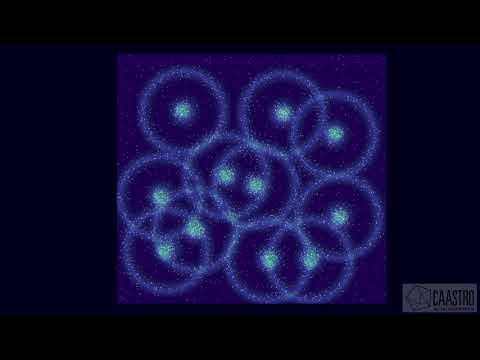

In [61]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('jpXuYc-wzk4', width=1200, height=900)

<center><img src=https://i.stack.imgur.com/AHOha.png width=1000 class='center'>

# Growth of structure: gravitational collapse

+ We are going to consider the time evolution of a small spherical overdensity. There are two reasons to consider a small inhomogeneity:

    1. The inhomogeneities in the early universe were small (see CMB)
    
    2. This will allow us to use a linear theory (remember: Taylor expansions of functions)
    
    
+ We will consider spherical geometry because that symmetry will make the math easy

+ First, we define the overdensity as the fractional difference to the mean density in the universe:

$$\delta\left(\vec{r}, t\right) \equiv \frac{\rho\left(\vec{r},t\right)-\bar{\rho}(t)}{\bar{\rho}(t)},\,\delta \ll1$$

## Exercise: acceleration experienced by a particle of the surface of a sphere of radius R with an overdensity of $\delta$



### You will be redirected to a breakout room with 2-3 other students for 5 minutes

### 1. Use Newton's gravity law to write the acceleration experienced by a test particle on the surface of a sphere of radius R whose (constant) density exceeds that of the universe by a factor of $\delta$


### 2. Rearrange terms so that it looks like the Friedman equation
    
### 3. Choose one person in the room to share your results with the rest of the class

+ If there was no overdensity, the acceleration would be zero, the acceleration will be originated by the gravitational attraction of the excess mass inside the sphere:

$$\ddot{R} = -\frac{G \Delta M}{R^2}=-\frac{G}{R^2}\frac{4\pi}{3}R^3\rho=-\frac{G}{R^2}\frac{4\pi}{3}R^3\bar{\rho}\delta$$

+ And we can rearrange it in the form:

$$\frac{\ddot{R}}{R}= -\frac{4\pi G \bar{\rho}}{3}\delta(t)$$

+ We cannot solve this equation, since we have two unknowns that change with time, $R$ and $\delta$

## Exercise: linking $R$ and $\delta$ for the spherical overdensity


### You will be redirected to a breakout room with 2-3 other students for 5 minutes

### 1. Write down the mass within the sphere as a function of $R$ and $\delta$

### 2. Use the fact that mass is conserved (we are not considering shell crossing) to write down a relationship between $R$ and $\delta$. Taylor expand for small overdensities
    
### 3. Choose one person in the room to share your results with the rest of the class

+ The mass of the spherical overdensity is straightforward:

$$M = \frac{4\pi}{3}R^3(t)\rho(t)=\frac{4\pi}{3}R^3(t)\bar{\rho}\left(1+\delta(t)\right)$$

+ From there, we can isolate $R$, knowing that $M$ is a constant (mass conservation):

$$R(t)=\left(\frac{3 M}{4\pi \bar{\rho}}\right)^{1/3}\left(1+\delta(t)\right)^{-1/3} = R_0 \left(1+\delta(t)\right)^{-1/3}$$

+ Since we know that $\delta <<1$, we can Taylor expand to get a linear relationship between both variables:

$$R(t)\approx R_0 \left(1-\frac{1}{3}\delta(t)\right)$$

## Exercise: finding a differential equation for the evolution of the overdensity $\delta$

### You will be redirected to a breakout room with 2-3 other students for 5 minutes

### 1. Combine the differential equation for $R$ and the relationship between $R$ and $\delta$ to find an equation for $\delta$

$$\frac{\ddot{R}}{R}= -\frac{4\pi G \bar{\rho}}{3}\delta(t)$$

$$R(t)\approx R_0 \left(1-\frac{1}{3}\delta(t)\right)$$

    
### 2. Choose one person in the room to share your results with the rest of the class

+ Taking time derivatives twice on the $R-\delta$ relationship:

$$\ddot{R} \approx -\frac{1}{3}R_0\ddot{\delta} \approx -\frac{1}{3}R \ddot{\delta}$$

+ Now we can substitute in the equation for the acceleration and we get the following differential equation:

$$\ddot{\delta}= 4 \pi G \bar{\rho}\delta$$

+ This equation can be solved analytically, and its general solution has the form:

$$\delta(t) = A \exp{\left(t\sqrt{4\pi G \bar{\rho}}\right)} + B \exp{\left(-t\sqrt{4\pi G \bar{\rho}}\right)}$$

+ The first term grows with time exponentially and it is called the growing mode. 

+ The second term is suppressed with time, also exponentially, and is called the vanishing mode. 

+ In practice, only the growing mode will persist and be observable. The constant can be determined by the initial conditinos.

+ That is: gravity makes small perturbations grow exponentially. The characteristic time is called dynamic time:

$$t_{dyn} = \frac{1}{\sqrt{4\pi G \bar{\rho}}}$$

+ Note that: 

    1. The existence of two modes (growing and vanishing) is quite common in physical instabilities
    
    2. The solution is only valid until $\delta$ stops being small relative to unity
    
    3. Note that the dynamical time does not depend on the size of the region, but just on the mean density of the medium

## Exercise: estimate the dynamic time for the air in your room

### You will be redirected to a breakout room with 2-3 other students for 5 minutes

### 1. Use the expression for the dynamical time, to estimate it for the air in your room

$$t_{dyn} = \frac{1}{\sqrt{4\pi G \bar{\rho}}}$$
    
### 2. Choose one person in the room to share your results with the rest of the class

+ The density of air at sea level is $\approx 1 kg/m^3$, this yields a dynamic time of 

$$t_{dyn}=\frac{1}{\sqrt{4 \pi 6.67 \times 10^{-11} \times 1}} = 9.6 \, \text{hours}$$

+ Why does the air in the class does not collapse, killing us all without air? 

+ Pressure! As a perturbation grows, increasing the density, so does the pressure, preventing air from collapsing. Pressure cannot build up instantaneously. It propagates by mollecule collisions, and any change propagates at the speed of sound of the medium. The characteristic time for a pressure gradient to propagate across a region of characteristic size $R$ is then:

$$t_{p} \approx \frac{R}{c_s}$$

+ It the region is small enough, by the time it wants to collapse, the pressure gradient builds up and stops it. 

+ This happens when the characteristic pressure time is smaller than the characteristic dynamic time. 

+ This also defines a maximum characteristic lenght for regions to be able to support themselves through pressure, the Jeans lenght (after Jeans, who studied this type of instabilities):

$$t_p \sim t_{dyn} \rightarrow R_J \sim c_s t_{dyn} \sim \frac{c_s}{\sqrt{G \bar{\rho}}}$$

## Exercise: estimate the Jeans length for the Earth's atmosphere

### You will be redirected to a breakout room with 2-3 other students for 5 minutes

### 1. Use the expression we just derived to compute the Jeans' length for the Earth's atmosphere

$$R_J \sim \frac{c_s}{\sqrt{G \bar{\rho}}}$$
    
### 2. Choose one person in the room to share your results with the rest of the class

+ The sound speed in the Earth's atmosphere is $\sim 340 m/s$, and the dynamical time is $\sim 9 hrs$ (we just computed it for our room), so the Jeans lenght is $\sim 11,000 km$



+ This is much larger than the atmosphere's characteristic height, which is why the Earth's atmosphere is stable to gravitational instabilities, and life does not suffocate because an initial overdensity induces a collapse of the atmosphere into a small area.

# Gravitational collapse in the early universe

+ We are going to discuss here, more quantitatively, some ideas explained in a hand-waivy way when discussing the BAO and the CMB power spectrum

+ Turns out the dynamic time for small overdensities is of the order of the hubble time. To see that, remember that, from Friedman's equation:

$$t_{Hubble}\equiv H^{-1} = \sqrt{\frac{3}{8\pi G \bar{\rho}}}$$

+ which turns out to be:

$$t_{Hubble} = \sqrt{3/2}t_{dyn}\sim t_{dyn}$$

+ The Jeans lenght then changes with cosmic time as

$$R_J \sim \frac{c_s}{H}$$

+ As the universe slows down its expansion, the Jeans lenght increases.

+ To be able to say more about the evolution of perturbations, we need to compute the speed of sound that enters the Jeans length expression

+ In general, the sound speed depens on the equation of state of the component under consideration. For radiation, we have (we will not prove it):

$$c_s = \frac{c}{\sqrt{3}}$$

+ And the Jeans lenght for a gas of photons is roughly:

$$R_J^{\gamma}\approx 3 \frac{c}{H}$$

+ three times the Hubble distance. Smaller perturbations will be pressure-supported, and not grow.

+ Just before recombination, the Hubble distance was $\frac{c}{H(z_{dec})} \approx 0.2 \, \text{Mpc}$. 

+ Prior to that time, photons are coupled to baryons, and they dominate the dynamics of the joint plasma. We can then assume that the presence of baryons does not change the Jeans lenght significanty:

$$R_J^{dec}\approx 0.6 \text{Mpc}$$

+ The mass withing such a region can be computed with the mean density at the time:

$$M_J \approx 10^{18} M_{\odot}$$

+ This mass is huge, bigger than that of any supercluster observed. That means that the structures we see today could not collapse while the baryons were still coupled to the photons, for the radiation pressure was capable of withholding any collapse.

+ After decoupling, we need to consider the speed of sound on the baryonic plasma, rather than the speed of sound of the photon gas, to assess the Jeans length:

$$c_s = \sqrt{\frac{k T}{mc^2}}c \approx \sqrt{0.26 \text{eV}}{1140 \text{MeV}}c \approx 10^{-5} c$$

+ The speed of sound for the baryonic gas decreases dramatically (as we mentioned when discussing the BAO), and so does the Jeans lenght and mass:

$$M_J\approx 10^5 M_{\odot}$$

+ This mass corresponds to a dwarf galaxy. As a result, cosmologically small overdensities cannot be sustained by pressure, due to the slowness of the sound speed, and can start collapsing, to generate graviationally bound objects. As the universe expands, the temperature drops and so does the Jeans mass.

# Gravitational collapse in an expanding universe

+ When we derived the exponential collapse for a spherical overdensity, we said nothing about the expansion of the universe.


+ Implicitely, we were assuming that spacetime was static (we were using just Newton's laws)


+ Intuitively, an expanding background may make it harder for an overdensity to collapse.


+ Let's see how:

+ The mass in the sphere is the same as before

$$M = \frac{4}{3}\pi R(t)^3 \rho(t) = \frac{4}{3}\pi R(t)^3 \bar{\rho}(t)(1+\delta(t))$$ 

+ And so is the relationship between radius and overdensity:

$$R(t) = \left(\frac{3}{4\pi}\right)^{1/3}\bar{\rho}^{-1/3}(t)\left(1+\delta(t)\right)^{-1/3}$$

+ If we consider that the mass is non-relativistic matter, the mean density evolves with the scale factor, and the mass within the sphere (constant) will be:

$$R \propto a(t)\left(1+\delta(t)\right)^{-1/3}$$

+ As we did before, we can write the acceleration experienced by a test particle on the surface of the sphere of radius $R$:

$$\ddot{R}=-\frac{GM}{R^2}$$

+ We can eliminate the mass using the relationship we just found:

$$\ddot{R} = -\frac{4\pi G}{3}\bar{\rho}(1+\delta)R$$

+ If we take derivaties twice on the radius scaling relationship, we get:

$$\dot{R}=\left(\frac{3}{4\pi}\right)^{1/3} \left[ \dot{a}\left(1+\delta\right)^{-1/3}-\frac{a}{3}\dot{\delta}\left(1+\delta\right)^{-4/3}\right]$$

$$\ddot{R} = \left(\frac{3}{4\pi}\right)^{1/3}\left[
\ddot{a}\left(1+\delta\right)^{-1/3} - \frac{2}{3}\dot{a}\dot{\delta}\left(1+\delta\right)^{-4/3}-
\frac{a}{3}\ddot{\delta}\left(1+\delta\right)^{-4/3} + \frac{4a}{9}\dot{\delta}^2\left(1+\delta\right)^{-7/4}
\right]$$

+ Dividing by R, and neglecting small terms (taking into consideration $\delta \ll 1$ and $\dot{\delta} \ll 1$), the equation simplified significantly:

$$\frac{\ddot{R}}{R} = \frac{\ddot{a}}{a}-\frac{1}{3}\ddot{\delta}-\frac{2}{3}\frac{\dot{a}}{a}\dot{\delta}$$

+ Finally, we can combine this expression with the one from Newton's law, and get the following:

$$\frac{\ddot{a}}{a}-\frac{1}{3}\ddot{\delta}-\frac{2}{3}\frac{\dot{a}}{a}\dot{\delta} = -\frac{4 \pi G}{3}\bar{\rho}\left(1+\delta\right)$$

+ This should look very familiar to you now

+ In this equation, if $\delta=0$ we get the second Friedmann equation for a homogeneous universe. Since that one is satisfied, we can keep only terms of order unity to find the equation followed by the perturbation:

$$\ddot{\delta} + 2 H \dot{\delta} = 4 \pi G \bar{\rho} \delta$$

+ This equation is the same found for the static background case, with an additional term proportional to $H$. 

+ This term has the form of a friction in a dynamic system, and will damp the growth of perturbations. Taking into consideration the definition of critical density: $\rho_{crit} = \frac{3H^2}{8\pi G}$ the equation can be rewritten as:

$$\ddot{\delta} + 2 H \dot{\delta} - \frac{3}{2}\Omega H^2 \delta = 0$$

+ The friction equation depends on the Hubble parameter: the faster the universe expands, the more friction there is on the growth of structure

+ The "source" of the collapse depends on the total mass of the perturbations, which depends on the (relative) overdensity, and the mean matter density.

## Example: structure growth during radiation domination

+ During radiation-domination, we saw that

$$a\propto t^{1/2}$$

+ The Hubble parameter is:

$$H = \frac{\dot{a}}{a} = ... = \frac{1}{2t}$$

+ And the linear equation for perturbations simplifies to:

$$\ddot{\delta}+\frac{1}{t}\dot{\delta}\approx0$$

+ This equation can be solved analytically, and the solution has the form:

$$\delta \approx A + B \ln t$$

+ During radiation domination, perturbations grow logarithmically, which is a rate slower than linear growth, for instance, and much lower than exponential

## Example: structure growth during matter domination

+ During matter domination, the expansion rate goes as:

$$a\propto  t ^{2/3}$$

+ The Hubble rate is:

$$H = \frac{\dot{a}}{a} = \frac{2}{3}\frac{t^{-1/3}}{t^{2/3}} = \frac{2}{3t}$$

+ and $\Omega \approx 1$, the linear equation simplifies to:

$$\ddot{\delta}+\frac{4}{3t}\dot{\delta}-\frac{2}{3t}\delta=0$$ 

+ This equation also has an analytic solution:

$$\delta \approx A t^{2/3} + B t^{-1}$$

+ We also have a growing and vanishing mode, but in this case they're not exponential. The growth of structures is slowed down relative to the case without expansion, with 

$$\delta \propto t^{2/3} \propto a(t)$$